<a href="https://colab.research.google.com/github/Subhajeet-Khawas/DeepLearningCampusX/blob/main/GradientDescent(BatchvsSGDvsMiniBatch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=df.iloc[:,2:4]
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [4]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [5]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape,X_test.shape

((320, 2), (80, 2))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model=Sequential()

In [10]:
model.add(Dense(10,activation="relu",input_dim=X.shape[1]))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Batch GD

In [15]:
import time
start = time.time()
history=model.fit(X_train_scaled,y_train,epochs=500,batch_size=320,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 0.7376 - accuracy: 0.5781 - val_loss: 0.7056 - val_accuracy: 0.6875
Epoch 2/500
1/1 [==============================] - 0s 94ms/step - loss: 0.7346 - accuracy: 0.6094 - val_loss: 0.7027 - val_accuracy: 0.6875
Epoch 3/500
1/1 [==============================] - 0s 107ms/step - loss: 0.7316 - accuracy: 0.6289 - val_loss: 0.6999 - val_accuracy: 0.6875
Epoch 4/500
1/1 [==============================] - 0s 131ms/step - loss: 0.7287 - accuracy: 0.6289 - val_loss: 0.6971 - val_accuracy: 0.6875
Epoch 5/500
1/1 [==============================] - 0s 146ms/step - loss: 0.7258 - accuracy: 0.6289 - val_loss: 0.6943 - val_accuracy: 0.6875
Epoch 6/500
1/1 [==============================] - 0s 112ms/step - loss: 0.7229 - accuracy: 0.6289 - val_loss: 0.6916 - val_accuracy: 0.6875
Epoch 7/500
1/1 [==============================] - 0s 154ms/step - loss: 0.7200 - accuracy: 0.6289 - val_loss: 0.6888 - val_accuracy: 0.6875
Epoch 8/500
1/1 [

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [22]:
accuracy_score(y_test,y_pred)

0.35

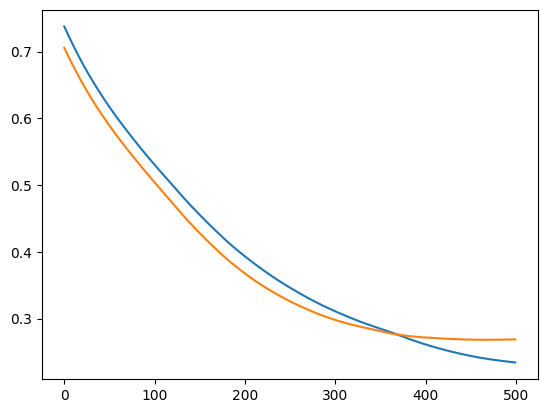

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

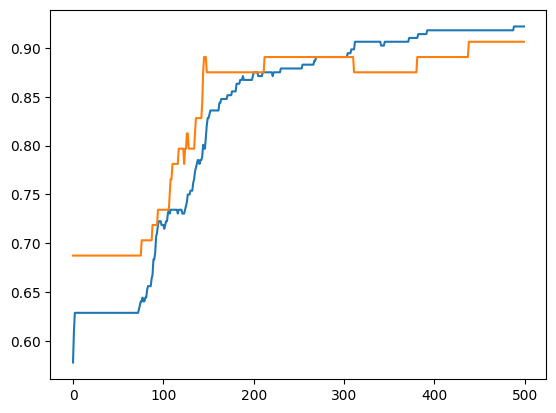

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

SGD

In [19]:
start = time.time()
history=model.fit(X_train_scaled,y_train,epochs=500,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
256/256 [==============================] - 3s 10ms/step - loss: 0.2387 - accuracy: 0.9180 - val_loss: 0.2701 - val_accuracy: 0.9062
Epoch 2/500
256/256 [==============================] - 2s 8ms/step - loss: 0.2341 - accuracy: 0.9180 - val_loss: 0.2719 - val_accuracy: 0.9062
Epoch 3/500
256/256 [==============================] - 2s 6ms/step - loss: 0.2287 - accuracy: 0.9219 - val_loss: 0.2727 - val_accuracy: 0.9062
Epoch 4/500
256/256 [==============================] - 2s 6ms/step - loss: 0.2288 - accuracy: 0.9180 - val_loss: 0.2748 - val_accuracy: 0.9062
Epoch 5/500
256/256 [==============================] - 1s 2ms/step - loss: 0.2259 - accuracy: 0.9219 - val_loss: 0.2733 - val_accuracy: 0.8906
Epoch 6/500
256/256 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9180 - val_loss: 0.2753 - val_accuracy: 0.8906
Epoch 7/500
256/256 [==============================] - 1s 2ms/step - loss: 0.2248 - accuracy: 0.9219 - val_loss: 0.2767 - val_accuracy: 0.890

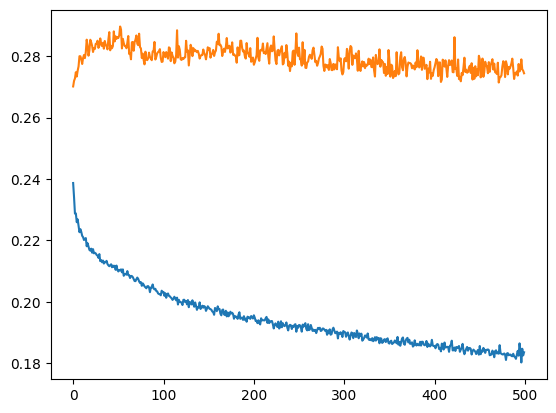

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

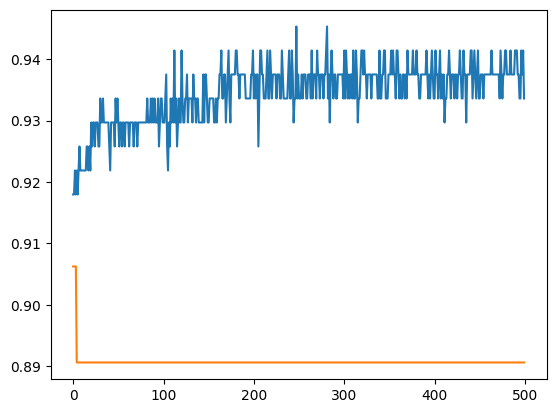

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [30]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

3/3 [==============================] - 0s 3ms/step


0.35

Mini Batch GD

In [26]:
start = time.time()
history=model.fit(X_train_scaled,y_train,epochs=500,batch_size=32,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
8/8 [==============================] - 0s 21ms/step - loss: 0.1765 - accuracy: 0.9375 - val_loss: 0.2731 - val_accuracy: 0.8906
Epoch 2/500
8/8 [==============================] - 0s 13ms/step - loss: 0.1770 - accuracy: 0.9375 - val_loss: 0.2726 - val_accuracy: 0.8906
Epoch 3/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1770 - accuracy: 0.9375 - val_loss: 0.2724 - val_accuracy: 0.8906
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1768 - accuracy: 0.9375 - val_loss: 0.2726 - val_accuracy: 0.8906
Epoch 5/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1766 - accuracy: 0.9375 - val_loss: 0.2726 - val_accuracy: 0.8906
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1764 - accuracy: 0.9375 - val_loss: 0.2727 - val_accuracy: 0.8906
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1762 - accuracy: 0.9375 - val_loss: 0.2728 - val_accuracy: 0.8906
Epoch 8/500
8/8 [===

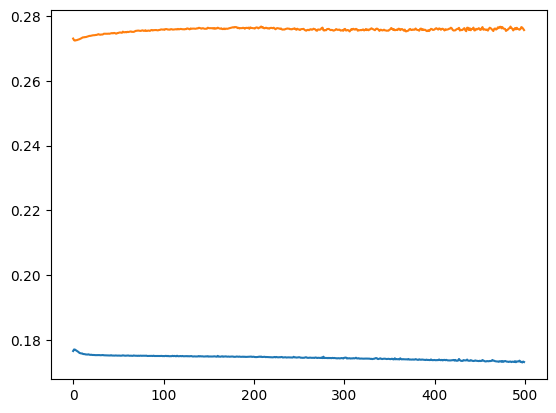

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

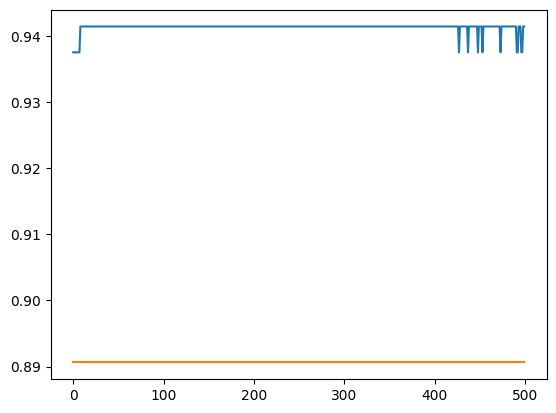

In [28]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [31]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

3/3 [==============================] - 0s 3ms/step


0.35